### this project is aboute creating twitter sentiment analysis program using Naive Bayes from scratch.

### this project can be considered as a small first step into natural language processing. Its goal is to improve my python skills (doing it from scratch) and take all tools and techniques learnt during GoMyCode training and continue discoving other models

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('C:/Users/inesm/Downloads/train/train.csv')
test_data = pd.read_csv('C:/Users/inesm/Downloads/test.csv')
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
test_data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


### preprocessing

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [5]:
train_data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [6]:
test_data.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [7]:
train_data.drop(["textID"], axis=1, inplace=True)
test_data.drop(["textID"], axis=1, inplace=True)

In [8]:
train_data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [9]:
test_data

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


In [10]:
train_data.dropna(axis=0, how='any', thresh=None, inplace=True)

###  just to facilitate computations we will work only with negative and positive sentiments

In [11]:
train_data=train_data[train_data['sentiment'] != "neutral"]

In [12]:
train_data["sentiment"].value_counts()

positive    8582
negative    7781
Name: sentiment, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['sentiment']=encoder.fit_transform(train_data["sentiment"])

In [14]:
train_data

,text,selected_text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
6,2am feedings for the baby are fun when he is a...,fun,1
...,...,...,...
27475,enjoy ur night,enjoy,1
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,1


In [15]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [16]:
train_data['text'] = train_data['text'].apply(lambda x: str(x))


In [17]:
train_data

,text,selected_text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
6,2am feedings for the baby are fun when he is a...,fun,1
...,...,...,...
27475,enjoy ur night,enjoy,1
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,1


In [18]:
#convert to lowercase
train_data['text'] = train_data['text'].apply(lambda x: x.lower())

In [19]:
train_data

,text,selected_text,sentiment
1,sooo sad i will miss you here in san diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"sons of ****, why couldn`t they put them on t...","Sons of ****,",0
6,2am feedings for the baby are fun when he is a...,fun,1
...,...,...,...
27475,enjoy ur night,enjoy,1
27476,wish we could come see u on denver husband l...,d lost,0
27477,i`ve wondered about rake to. the client has ...,", don`t force",0
27478,yay good for both of you. enjoy the break - y...,Yay good for both of you.,1


In [20]:
#remove URLs
train_data['text'] = train_data['text'].apply(lambda x: re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', x) )

In [21]:
train_data["text"]

1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of ****, why couldn`t they put them on t...
6        2am feedings for the baby are fun when he is a...
                               ...                        
27475                                       enjoy ur night
27476     wish we could come see u on denver  husband l...
27477     i`ve wondered about rake to.  the client has ...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  ****.
Name: text, Length: 16363, dtype: object

In [22]:
#remove #
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'#([^\s]+)', r'\1', x) ) # leave only 2 har from repeated char

In [24]:
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x) )

#### for words with repeated char we will leave only 2 from those char so that meaningful words with 2 successive similar char don't loose their meaning. 

In [25]:
train_data

,text,selected_text,sentiment
1,soo sad i will miss you here in san diego!!,Sooo SAD,0
2,my boss is bullying me..,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"sons of **, why couldn`t they put them on the...","Sons of ****,",0
6,2am feedings for the baby are fun when he is a...,fun,1
...,...,...,...
27475,enjoy ur night,enjoy,1
27476,wish we could come see u on denver husband l...,d lost,0
27477,i`ve wondered about rake to. the client has ...,", don`t force",0
27478,yay good for both of you. enjoy the break - y...,Yay good for both of you.,1


In [26]:
train_data['text'] = train_data['text'].apply(lambda x:word_tokenize(x) ) # remove the # in #hashtag

In [27]:
train_data

,text,selected_text,sentiment
1,"[soo, sad, i, will, miss, you, here, in, san, ...",Sooo SAD,0
2,"[my, boss, is, bullying, me, ..]",bullying me,0
3,"[what, interview, !, leave, me, alone]",leave me alone,0
4,"[sons, of, *, *, ,, why, couldn, `, t, they, p...","Sons of ****,",0
6,"[2am, feedings, for, the, baby, are, fun, when...",fun,1
...,...,...,...
27475,"[enjoy, ur, night]",enjoy,1
27476,"[wish, we, could, come, see, u, on, denver, hu...",d lost,0
27477,"[i, `, ve, wondered, about, rake, to, ., the, ...",", don`t force",0
27478,"[yay, good, for, both, of, you, ., enjoy, the,...",Yay good for both of you.,1


### visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

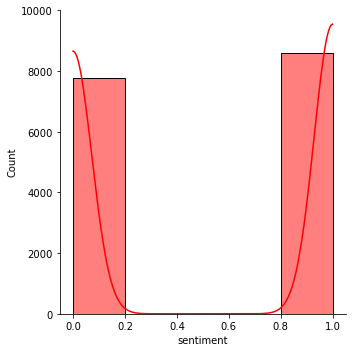

In [30]:
sns.displot(train_data["sentiment"], bins=5, kde=True, color="red")

In [31]:
from wordcloud import WordCloud 

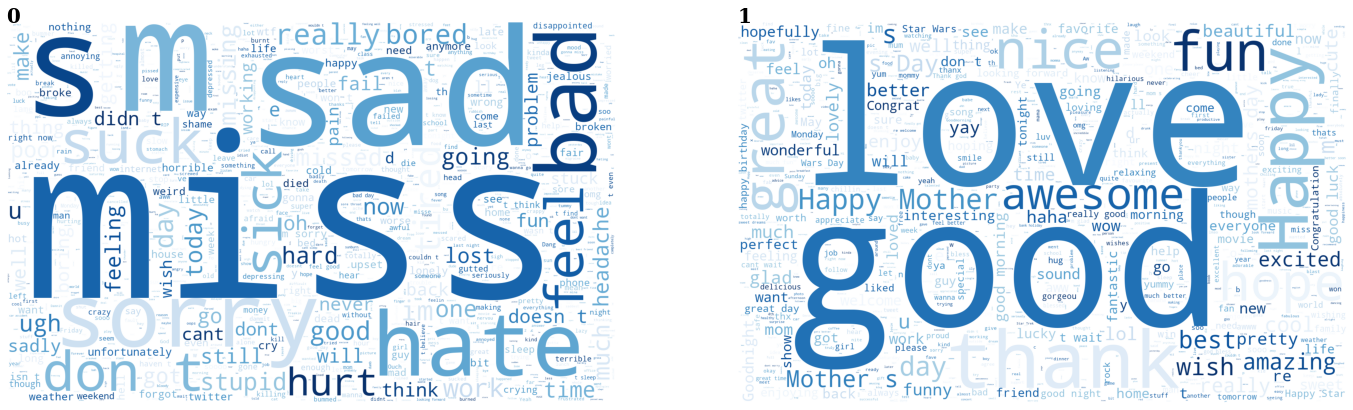

In [32]:
fig, axes = plt.subplots(1,2, figsize=(24,12))
sentiment_list = np.unique(train_data['sentiment'])

for i, sentiment in zip(range(2), sentiment_list):
    wc = WordCloud(background_color="white", max_words = 2000, width = 1600, height = 1000, colormap="Blues").generate(" ".join(train_data[train_data['sentiment']==sentiment]['selected_text']))
    
    axes[i].text(0.1,0.8, "{} ".format(sentiment), fontweight="bold", fontfamily='serif', fontsize=20)
    axes[i].patch.set_alpha(0)
    axes[i].axis('off')
    axes[i].imshow(wc)

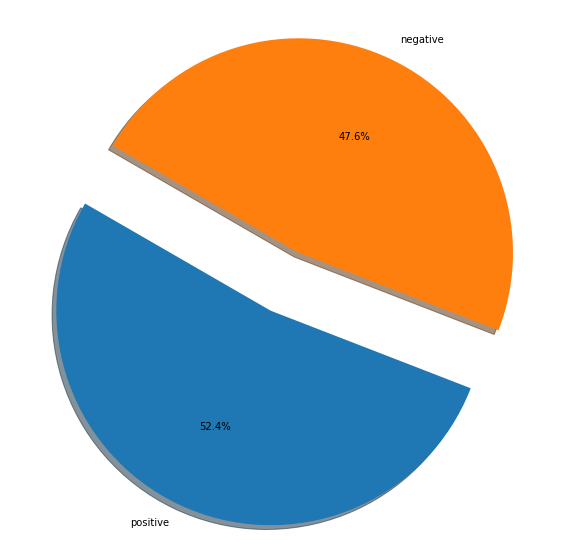

In [33]:
embarked_count=[644,168,77]
sentiments=['positive', 'negative']
explode=[0.1,0.2]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(train_data['sentiment'].value_counts(), explode=explode,labels=sentiments,autopct='%1.1f%%',
        shadow=True, startangle=150)
ax1.axis('equal')

plt.show()

# Naive Bayes Classifier

#### build vocabulary: it is all words we have in the training set with its frequency(number of occurrences in the set) as a key.

In [35]:
def create_frequency(tweets, ys):
    
    freq_d = {}
    for tweet, y in zip(tweets, ys):
        for word in tweet:
            pair=(word,y)
            if pair in freq_d:
                freq_d[pair]+=1
            else:
                freq_d[pair]=freq_d.get(pair,1)
    
    return freq_d

In [36]:
freq_d = create_frequency(train_data["text"], train_data["sentiment"])
print(freq_d)

{('soo', 0): 128, ('sad', 0): 397, ('i', 0): 5762, ('will', 0): 217, ('miss', 0): 427, ('you', 0): 1049, ('here', 0): 191, ('in', 0): 1128, ('san', 0): 8, ('diego', 0): 6, ('!', 0): 3181, ('my', 0): 2039, ('boss', 0): 8, ('is', 0): 1345, ('bullying', 0): 1, ('me', 0): 994, ('..', 0): 2152, ('what', 0): 312, ('interview', 0): 8, ('leave', 0): 54, ('alone', 0): 34, ('sons', 0): 1, ('of', 0): 905, ('*', 0): 1324, (',', 0): 2310, ('why', 0): 207, ('couldn', 0): 41, ('`', 0): 3712, ('t', 0): 1261, ('they', 0): 244, ('put', 0): 37, ('them', 0): 118, ('on', 0): 800, ('the', 0): 2458, ('releases', 0): 1, ('we', 0): 250, ('already', 0): 102, ('bought', 0): 13, ('2am', 1): 2, ('feedings', 1): 1, ('for', 1): 1337, ('the', 1): 2999, ('baby', 1): 61, ('are', 1): 475, ('fun', 1): 347, ('when', 1): 178, ('he', 1): 198, ('is', 1): 1137, ('all', 1): 679, ('smiles', 1): 8, ('and', 1): 1687, ('coos', 1): 1, ('journey', 1): 8, ('!', 1): 5858, ('?', 1): 823, ('wow', 1): 111, ('..', 1): 1884, ('u', 1): 340,

###  Naive Bayes

#### all equations of prior and likelihood was taken from the internet. we used the log to avoid extreme values

In [39]:
def train_naive_bayes(freq_d, train_x, train_y):
  
    loglikelihood = {}
    logprior = 0
    
    unique_words = set([pair[0] for pair in freq_d.keys()])
    V = len(unique_words)
    
    # calculate the number of positive and negative we have in our vocab
    Number_of_positive = Number_of_negative = 0
    for pair in freq_d.keys():
        if pair[1]>0:
            Number_of_positive+= freq_d[(pair)]
        else:
            Number_of_negative+= freq_d[(pair)]

            
    tweets = train_y.shape[0]
    
    #calculate the number of positive in the trainingset
    tweets_positive = sum(train_y)
    
   #calculate the number of positive in the trainingset
    tweets_negative = tweets-tweets_positive
    
    # calculate logprior
    logprior = np.log(tweets_positive)-np.log(tweets_negative)
    
    # for each unqiue word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freq_d.get((word,1),0)
        freq_neg = freq_d.get((word,1),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos+1)/(Number_of_positive+V)
        p_w_neg = (freq_neg+1)/(Number_of_negative+V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood
    

In [40]:
logprior, loglikelihood = train_naive_bayes(freq_d, train_data['text'], train_data["sentiment"])
print(logprior)
print(len(loglikelihood))

0.09798212193453892
18820


In [42]:
def naive_bayes_predict(tweet, logprior, loglikelihood):

    word_l = word_tokenize(tweet)
    p = 0

    p += logprior
    for word in word_l:
        if word in loglikelihood:
            p=p+loglikelihood[word]
            

    return p

In [43]:
p = naive_bayes_predict("I am sad I miss you", logprior, loglikelihood)

In [44]:
p

-0.1528974925434427

In [45]:
p = naive_bayes_predict("I am happy today", logprior, loglikelihood)

In [46]:
p

-0.09017758892394734

### how it works: when p is a big negative number, the model predicts it's negative. well these results stays relative. it means we can not take it forther to compare 2 tweets with each other for example because it really depends on the number of words in the tweets. 